In [1]:
# Plot the vertical section of sea temperature to look at the stratification in the upper ocean.

In [1]:
# Import relevant modules
import xarray as xr
import numpy as np
import pydap
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cfeature           # import features
import uuid
from scipy import interpolate
import scipy.io
from glob import glob
import os
from matplotlib.offsetbox import AnchoredText

In [2]:
# Set the relevant paths.

path2CTD = '/home/agostino/SST-impact_data/'
CTDfilename = '81593.nc'

In [3]:
ds_ctd = xr.open_dataset(path2CTD + CTDfilename)
ds_ctd
# N_LEVELS is the depth in meters.

<xarray.Dataset>
Dimensions:                   (N_BOTTLES: 14, N_LEVELS: 3082, N_PARAM: 25, N_PARAM_CHIM: 9, N_PROF: 64)
Dimensions without coordinates: N_BOTTLES, N_LEVELS, N_PARAM, N_PARAM_CHIM, N_PROF
Data variables: (12/126)
    STATION_PARAMETER         (N_PARAM) |S4 ...
    SHIP_NAME                 (N_PROF) |S30 ...
    SHIP_WMO_ID               (N_PROF) |S16 ...
    PI_NAME                   (N_PROF) |S64 ...
    PI_ORGANISM               (N_PROF) |S16 ...
    CRUISE_NAME               (N_PROF) |S16 ...
    ...                        ...
    CHOXYKP_PREC              (N_PROF) float32 ...
    CHTMPOB                   (N_PROF, N_BOTTLES) float32 ...
    CHTMPOB_QC                (N_PROF, N_BOTTLES) float32 ...
    CHTMPOB_RESP              (N_PROF) object ...
    CHTMPOB_RESP_ORG          (N_PROF) object ...
    CHTMPOB_PREC              (N_PROF) float32 ...
Attributes: (12/17)
    Data_type:             CTD
    Format_version:        MLT 1.0-2014
    Reference_date_time:   19500101000000
    Reference_param:       DEPH
    Project_name:          EUREC4A-OA
    Date_creation:         20201118092608
    ...                    ...
    North_latitude:        13.15224
    West_longitude:        -59.1705
    East_longitude:        -52.683
    Coord_system:          GEOGRAPHICAL-WGS84
    Data_level:            L2B
    CHEMISTRY_PARAMETERS:  Y

In [33]:
tpot = ds_ctd.TPOT.values
time = ds_ctd.JULD.values
depth = np.arange(0,ds_ctd.N_LEVELS.values.max()+1)
depth2d = ds_ctd.DEPH.values

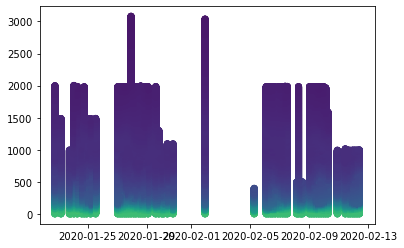

In [41]:
for kk in range(len(depth)):
    plt.scatter(time, depth2d[:,kk], c=tpot[:,kk], vmin = 0, vmax=40)

# No CTD were performed in the very first days of February...

In [5]:
# Try with the MERGED_stations.nc file

filename_m = 'MERGED_stations.nc'
ds_m = xr.open_dataset(path2CTD+filename_m)
ds_m

<xarray.Dataset>
Dimensions:    (N_profile: 2277, N_variable: 12, Sigma_dimension: 900, Z_dimension: 2001)
Dimensions without coordinates: N_profile, N_variable, Sigma_dimension, Z_dimension
Data variables:
    LON        (N_profile) float32 ...
    LAT        (N_profile) float32 ...
    TIME       (N_profile) float32 ...
    TYPE       (N_profile) int64 ...
    VAR_dim    (N_variable) int64 ...
    DEPTH      (Z_dimension) float32 ...
    SIGMA      (Sigma_dimension) float32 ...
    VAR_Z      (N_variable, N_profile, Z_dimension) float32 ...
    VAR_SIGMA  (N_variable, N_profile, Sigma_dimension) float32 ...
Attributes:
    description:  Variables 0:Pressure; 1:Temperature; 2:Salinity; 3:Density;...

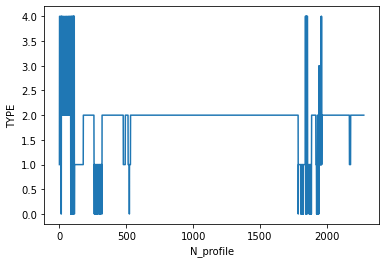

In [6]:
ds_m.TYPE.plot()

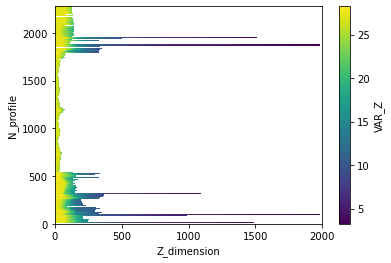

In [7]:
ds_m.VAR_Z[1,:,:].plot()

In [8]:
temp = ds_m.VAR_Z[1,:,:].values
salt = ds_m.VAR_Z[2,:,:].values
strat = ds_m.VAR_Z[6,:,:].values # stratification
depth = ds_m.DEPTH.values
lon_m = ds_m.LON.values
lat_m = ds_m.LAT.values
time = ds_m.TIME.values
instrument = ds_m.TYPE.values

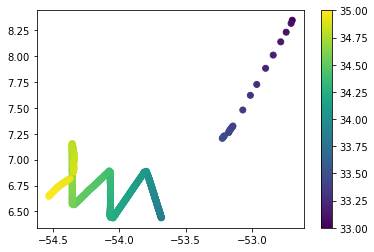

ValueError: operands could not be broadcast together with shapes (2277,) (757,) 

In [15]:
idtime = (time>33)&(time<35)

sc = plt.scatter(lon_m[idtime],lat_m[idtime],c=time[idtime],vmin=33,vmax=35)
plt.colorbar(sc)
plt.show()

instrument_time = instrument[idtime]
idtype = (instrument_time==2) # to select MVP only.

sc = plt.scatter(lon_m[idtime][idtype],lat_m[idtime][idtype],c=time[idtime][idtype],vmin=33,vmax=35)
plt.colorbar(sc)
plt.show()

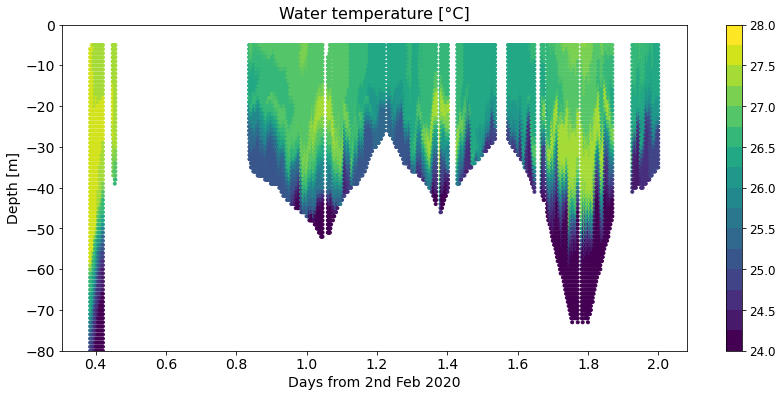

In [17]:
from matplotlib import cm
viridis8 = cm.get_cmap('viridis', 16)

plt.figure(figsize=(14,6))
for kk in range(len(depth)):
    sc = plt.scatter(time[idtime][idtype]-33,depth[kk]*np.ones_like(time[idtime][idtype]),
                     c=temp[idtime,kk][idtype],vmin=24,vmax=28,
                     marker='.',cmap=viridis8)
    
plt.ylim(-80,0)
plt.xlabel('Days from 2nd Feb 2020',fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
cb = plt.colorbar(sc)
cb.ax.tick_params(labelsize=12)
plt.tick_params(axis='both',labelsize=14)
plt.title('Water temperature [°C]',fontsize=16)

name_fig = 'vertical_section_water_temperature_mvp.png'
plt.savefig(name_fig,bbox_inches='tight')

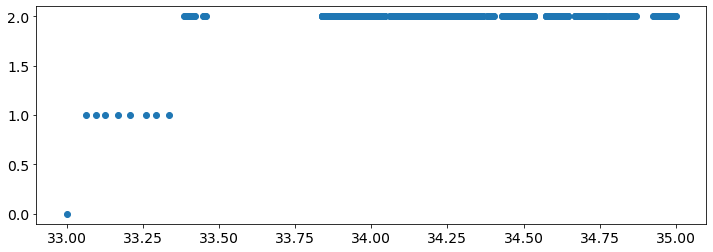

In [102]:
#  Type indicates the type of device 0:CTD; 1:UCTD; 2:MVP; 3:XCTD; 4:XBT
plt.figure(figsize=(12,4))
plt.plot(time[idtime],instrument[idtime],'o')
plt.tick_params(axis='both',labelsize=14)

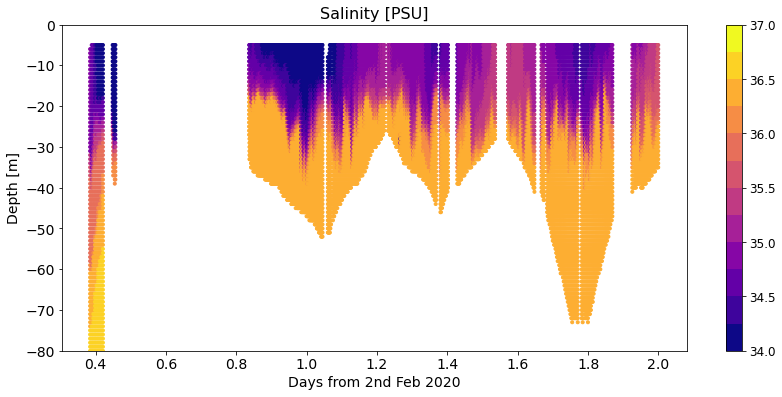

In [19]:
from matplotlib import cm
plasma = cm.get_cmap('plasma', 12)

plt.figure(figsize=(14,6))
for kk in range(len(depth)):
    sc = plt.scatter(time[idtime][idtype]-33,depth[kk]*np.ones_like(time[idtime][idtype]),
                     c=salt[idtime,kk][idtype],vmin=34,vmax=37,
                     marker='.',cmap=plasma)
    
plt.ylim(-80,0)
plt.xlabel('Days from 2nd Feb 2020',fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
cb = plt.colorbar(sc)
cb.ax.tick_params(labelsize=12)
plt.tick_params(axis='both',labelsize=14)
plt.title('Salinity [PSU]',fontsize=16)

# Is there a calibration issue between UCTD and MVP?

name_fig = 'vertical_section_water_salinity_mvp.png'
plt.savefig(name_fig,bbox_inches='tight')

Text(0.5, 1.0, 'Stratification [1/s???]')

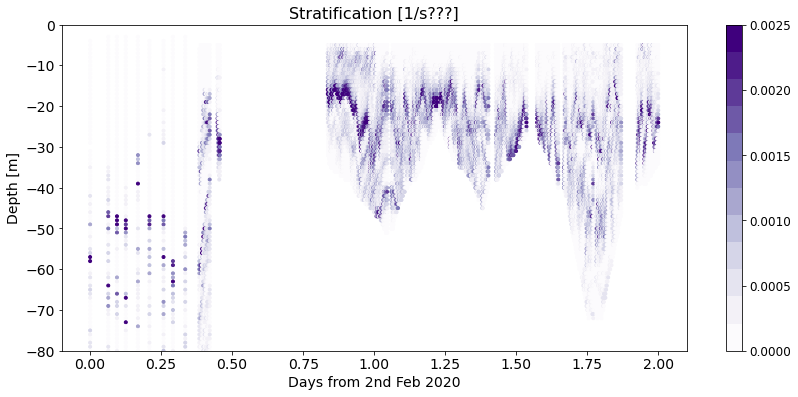

In [127]:
from matplotlib import cm
purples = cm.get_cmap('Purples', 12)

plt.figure(figsize=(14,6))
for kk in range(len(depth)):
    sc = plt.scatter(time[idtime]-33,depth[kk]*np.ones_like(time[idtime]),c=strat[idtime,kk],vmin=0,
                     vmax=2.5e-3,marker='.',cmap=purples)
    
plt.ylim(-80,0)
plt.xlabel('Days from 2nd Feb 2020',fontsize=14)
plt.ylabel('Depth [m]',fontsize=14)
cb = plt.colorbar(sc)
cb.ax.tick_params(labelsize=12)
plt.tick_params(axis='both',labelsize=14)
plt.title('Stratification [1/s???]',fontsize=16)